$$
\begin{align*}
\frac{dV_{LV}}{dt} &= Q_{MI} - Q_{Ao}\\
\frac{dV_{sa}}{dt} &= Q_{Ao} - Q_{s}\\
&\\
V_{LV} &= C_{LV}P_{LV}\\
V_{sa} &= C_{sa}P_{sa}\\
\\
S_{Mi|Ao} &:= valvulas\\
\\
Q_{MI} &= S_{Mi} \frac{P_{LA}-P_{LV}}{R_{Mi}}\\
Q_{Ao} &= S_{Ao} \frac{P_{LV}-P_{sa}}{R_{Ao}}\\
Q_{s} &= \frac{P_{sa}}{R_{s}}\\

C_{LV} &= piecewise\\
\end{align*}

In [8]:
set(['p_CLV','p_PLV','p_SMi','p_PLA' ,'p_PLV','p_RMi','p_SAo','p_PLV' ,'p_Psa','p_RAo','p_Csa','p_Psa','p_SAo','p_PLV' ,'p_Psa','p_RAo' ,'p_Psa','p_Rs'])

{'p_CLV',
 'p_Csa',
 'p_PLA',
 'p_PLV',
 'p_Psa',
 'p_RAo',
 'p_RMi',
 'p_Rs',
 'p_SAo',
 'p_SMi'}

In [322]:
from sympy import *#symbols,functions,Derivative,Function, Piecewise , Eq, integrate,dsolve
from sympy.solvers.ode.systems import dsolve_system
from functools import  partial,reduce
from itertools import repeat, product
import numpy as np
import scipy as sp
import pprint  as pp
import matplotlib.pyplot as plt
import math
from ipywidgets import interact,widgets

In [201]:
params =  [
        'ts' ,
        'td',
        'Cdlv',
        'Cslv',
        'Pla',
        'Rao',
        'Rmi',
        'Csa',
        'Rs',
        'Sao',
        'Smi',
        'Clv',
     ]

funcs = [
        'Plv',
        'Psa',
        'Vlv',
    ]

t,T,Ts, = symbols('t T Ts')

p_syms = symbols(['p_'+s for s in params])
f_syms = symbols(['f_'+s for s in funcs], cls = Function)

print(p_syms)
print(f_syms)

valve = lambda v1,v2: int(v1 > v2)

[p_ts, p_td, p_Cdlv, p_Cslv, p_Pla, p_Rao, p_Rmi, p_Csa, p_Rs, p_Sao, p_Smi, p_Clv]
[f_Plv, f_Psa, f_Vlv]


In [81]:
p = lambda p :  dict(zip(params,p_syms))[p]
f = lambda f :  dict(zip(funcs ,f_syms))[f]


In [203]:
ec1 = Eq( 
    (p('Clv')*f('Plv')(t)).diff(t) , 
    p('Smi')*(p('Pla')    - f('Plv')(t))/p('Rmi') -
    p('Sao')*(f('Plv')(t) - f('Psa')(t))/p('Rao')
)



In [139]:
ec2 = Eq( (p('Csa')*f('Psa')(t)).diff(t) , 
     p('Sao')*(f('Plv')(t) - f('Psa')(t))/p('Rao') -
             (f('Psa')(t))              /p('Rs')
)

In [205]:
sol = dsolve_system((ec1_2,ec2), [f('Plv')(t) , f('Psa')(t)])

In [207]:
simplify(sol[0][0])

Eq(f_Plv(t), (-C2*p_Csa*p_Rmi*p_Rs*p_Sao*(p_Rao*p_Smi + p_Rmi*p_Sao)*exp(t*(p_Csa*p_Rs*(p_Rao*p_Smi + p_Rmi*p_Sao) + p_Rao*p_Smi + p_Rmi*p_Sao + p_Rs*p_Sao*p_Smi)/(p_Csa*p_Rs*(p_Rao*p_Smi + p_Rmi*p_Sao))) - p_Rmi*p_Rs*p_Sao**2*(-Integral(-p_Pla*p_Smi*exp(p_Rao*p_Smi*t/(p_Csa*p_Rao*p_Rs*p_Smi + p_Csa*p_Rmi*p_Rs*p_Sao))*exp(p_Rmi*p_Sao*t/(p_Csa*p_Rao*p_Rs*p_Smi + p_Csa*p_Rmi*p_Rs*p_Sao))*exp(p_Rs*p_Sao*p_Smi*t/(p_Csa*p_Rao*p_Rs*p_Smi + p_Csa*p_Rmi*p_Rs*p_Sao)), t) - Integral(p_Rmi*exp(p_Rao*p_Smi*t/(p_Csa*p_Rao*p_Rs*p_Smi + p_Csa*p_Rmi*p_Rs*p_Sao))*exp(p_Rmi*p_Sao*t/(p_Csa*p_Rao*p_Rs*p_Smi + p_Csa*p_Rmi*p_Rs*p_Sao))*exp(p_Rs*p_Sao*p_Smi*t/(p_Csa*p_Rao*p_Rs*p_Smi + p_Csa*p_Rmi*p_Rs*p_Sao))*Derivative(f_Vlv(t), t), t))*exp(t*(p_Csa*p_Rs*(p_Rao*p_Smi + p_Rmi*p_Sao) + p_Rao*p_Smi + p_Rmi*p_Sao + p_Rs*p_Sao*p_Smi)/(p_Csa*p_Rs*(p_Rao*p_Smi + p_Rmi*p_Sao))) + (C1 - (Integral(-p_Pla*p_Smi*exp(t), t) + Integral(p_Rmi*exp(t)*Derivative(f_Vlv(t), t), t))*(p_Csa*p_Rao*p_Rs - p_Rao - p_Rs*p_Sao)/(p_C

In [208]:
sol[0][0]

Eq(f_Plv(t), C1*exp(-t) - C2*p_Csa*p_Rmi*p_Rs*p_Sao*exp(-t*(p_Rao*p_Smi + p_Rmi*p_Sao + p_Rs*p_Sao*p_Smi)/(p_Csa*p_Rs*(p_Rao*p_Smi + p_Rmi*p_Sao)))/(-p_Csa*p_Rs*(p_Rao*p_Smi + p_Rmi*p_Sao) + p_Rao*p_Smi + p_Rmi*p_Sao + p_Rs*p_Sao*p_Smi) - p_Rmi*p_Rs*p_Sao**2*exp(-t*(p_Rao*p_Smi + p_Rmi*p_Sao + p_Rs*p_Sao*p_Smi)/(p_Csa*p_Rs*(p_Rao*p_Smi + p_Rmi*p_Sao)))*Integral(p_Pla*p_Smi*exp(t*(p_Rao*p_Smi/p_Rs + p_Rmi*p_Sao/p_Rs + p_Sao*p_Smi)/(p_Csa*(p_Rao*p_Smi + p_Rmi*p_Sao))) - p_Rmi*exp(t*(p_Rao*p_Smi/p_Rs + p_Rmi*p_Sao/p_Rs + p_Sao*p_Smi)/(p_Csa*(p_Rao*p_Smi + p_Rmi*p_Sao)))*Derivative(f_Vlv(t), t), t)/((p_Rao*p_Smi + p_Rmi*p_Sao)*(-p_Csa*p_Rs*(p_Rao*p_Smi + p_Rmi*p_Sao) + p_Rao*p_Smi + p_Rmi*p_Sao + p_Rs*p_Sao*p_Smi)) + exp(-t)*Integral(p_Pla*p_Rao*p_Smi*exp(t)/(p_Rao*p_Smi + p_Rmi*p_Sao) + p_Pla*p_Rmi*p_Rs*p_Sao**2*p_Smi*exp(t)/(-p_Csa*p_Rao**2*p_Rs*p_Smi**2 - 2*p_Csa*p_Rao*p_Rmi*p_Rs*p_Sao*p_Smi - p_Csa*p_Rmi**2*p_Rs*p_Sao**2 + p_Rao**2*p_Smi**2 + 2*p_Rao*p_Rmi*p_Sao*p_Smi + p_Rao*p_Rs*p_Sa

In [142]:

#testing
x,y,z = symbols('x y z')
ff = symbols ('f',cls=Function)
z = x+y**2
ff(x)


f(x)

In [285]:
subDict_val ={
    p('ts')      : 0.0025      ,
    p('td')      : 0.0075      ,
    p('Cdlv')    : 0.0146      ,
    p('Cslv')    : 0.00003       ,
    p('Pla')     : 5      ,
    p('Rao')     : 0.01      ,
    p('Rmi')     : 0.01      ,
    Ts           :   0.005,
    T            :   0.0125,
    'Rs'         : 17.5 ,
    'Csa'        : 0.00175
    }

v = lambda v: (subDict_val[v] if v in subDict_val.keys() else subDict_val[p(v)])

In [163]:
pwf_Clv = Piecewise(
                (p('Cdlv')*(p('Cslv')/p('Cdlv'))**( (1-exp(-t/p('ts')) ) / (1-exp(-Ts/p('ts')) ) ) , t<Ts ),
                (p('Cslv')*(p('Cdlv')/p('Cslv'))**( (1-exp((Ts-t)/p('td')) ) / (1-exp((Ts-T)/p('td')) ) ) , t<=T ),
                (69,True)
                )
sub_Clv = pwf_Clv.subs(subDict_val)
lfy_Clv =  lambdify( [t],sub_Clv )

lf_Clv = lambda t : lfy_Clv(t%subDict_val[T])

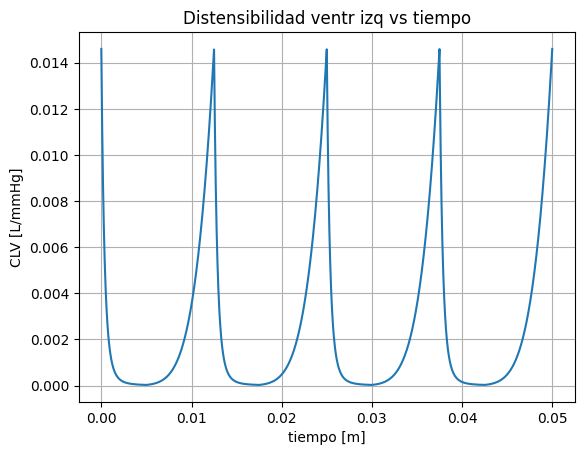

In [ ]:
ls = np.linspace(0, subDict_val[T]*4  ,10000)
plt.plot(ls, 
list(map(lf_Clv,ls))
)
#plt.legend( legends ,loc=4 )
plt.ylabel("CLV [L/mmHg]")
plt.xlabel("tiempo [m]")
plt.title("Distensibilidad ventr izq vs tiempo")
plt.grid(visible=True)
#plt.savefig("fig_CLV_bono.jpg")

note que:
$$
\frac{V_{LV}}{C_{LV}} = P_{LV}
$$

In [296]:
# Vlv := y0 
# Psa := y1
f_Plv = lambda t , y : y[0]/lf_Clv(t)
f_Qmi = lambda t , y : valve(v('Pla')   , f_Plv(t,y)  ) * ( v('Pla')    - f_Plv(t,y) ) / v('Rmi')
f_QAo = lambda t , y : valve(f_Plv(t,y) , y[1]        ) * ( f_Plv(t,y)  - y[1]       ) / v('Rao')
f_Qs  = lambda t , y : y[1]/v('Rs')
f_Vlv = lambda t , y :  f_Qmi(t,y) - f_QAo(t,y)
f_Psa = lambda t , y : (f_QAo(t,y) - f_Qs(t,y))/v('Csa')
#f_Plv = lambda t , y : 
f_simpleHeart = lambda t,y: (f_Vlv(t,y),f_Psa(t,y))

In [329]:
span_t = (0,0.05)
sol = sp.integrate.solve_ivp(  f_simpleHeart , span_t  , (0.01,90) )

In [330]:
sim_Plv =list( map(lambda t , v :  v/lf_Clv(t) , sol.t ,sol.y[0] ))
sim_Psa =list( sol.y[1])

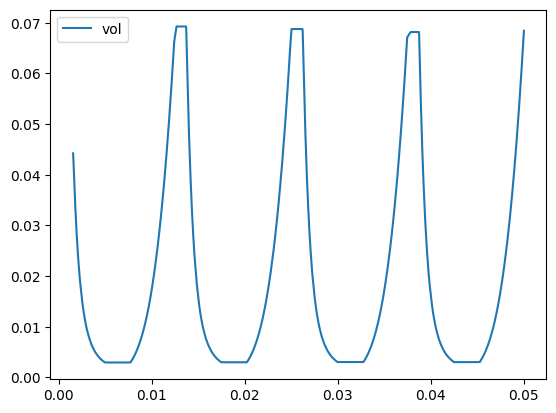

In [332]:
plt.plot(sol.t[10:] , 
        list (zip(
        sol.y[0][10:],
        sol.y[1][10:],
        sim_Plv[10:]
        ))
)
plt.legend(['vol','Psa','Plv'])

In [327]:
iv_v    = 0.01
iv_psa  = 90
ivl_vlv =[[x] for x in np.linspace(iv_v*0.9,iv_v*1.1,4)]
ivl_psa =[[x] for x in np.linspace(iv_psa*0.9,iv_psa *1.1,4)]
ivl = (product(ivl_vlv, ivl_psa))





